In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('GBPJPY_5Y.csv')
df = df.iloc[1:,1:-1]

In [6]:
df.shape

(1293, 5)

In [7]:
df.head()

Date      Open      High       Low     Close
1  20140606  172.2500  172.5225  171.8365  172.1775
2  20140609  172.3750  172.5465  172.0035  172.2735
3  20140610  172.2595  172.3445  171.3515  171.5130
4  20140611  171.4745  171.8070  170.9650  171.3650
5  20140612  171.2500  172.2630  171.0400  172.1650

In [8]:
df.tail()

Date      Open     High       Low     Close
1289  20190528  138.8425  139.016  138.2930  138.3890
1290  20190529  138.3975  138.586  137.8740  138.3795
1291  20190530  138.4275  138.738  138.0615  138.2055
1292  20190531  138.1505  138.246  136.6360  136.7740
1293  20190603  136.8250  137.125  136.6200  136.8900

In [9]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Study Period : ",delta)
print('Slash: 80% - 20% : ')
print('Bloc 1 : ',bloc1,' periods \nBloc 2 :',bloc2,' periods')

Study Period :  1293
Slash: 80% - 20% : 
Bloc 1 :  1034  periods 
Bloc 2 : 259  periods


In [10]:
dataset_1D = df.copy()

In [11]:
rsi = talib.RSI(dataset_1D['Close'],timeperiod=14)
upper, middle, lower =  talib.BBANDS(dataset_1D['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1D['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1D['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1D['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1D['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1D['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1D['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1D['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1D['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1D['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1D['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

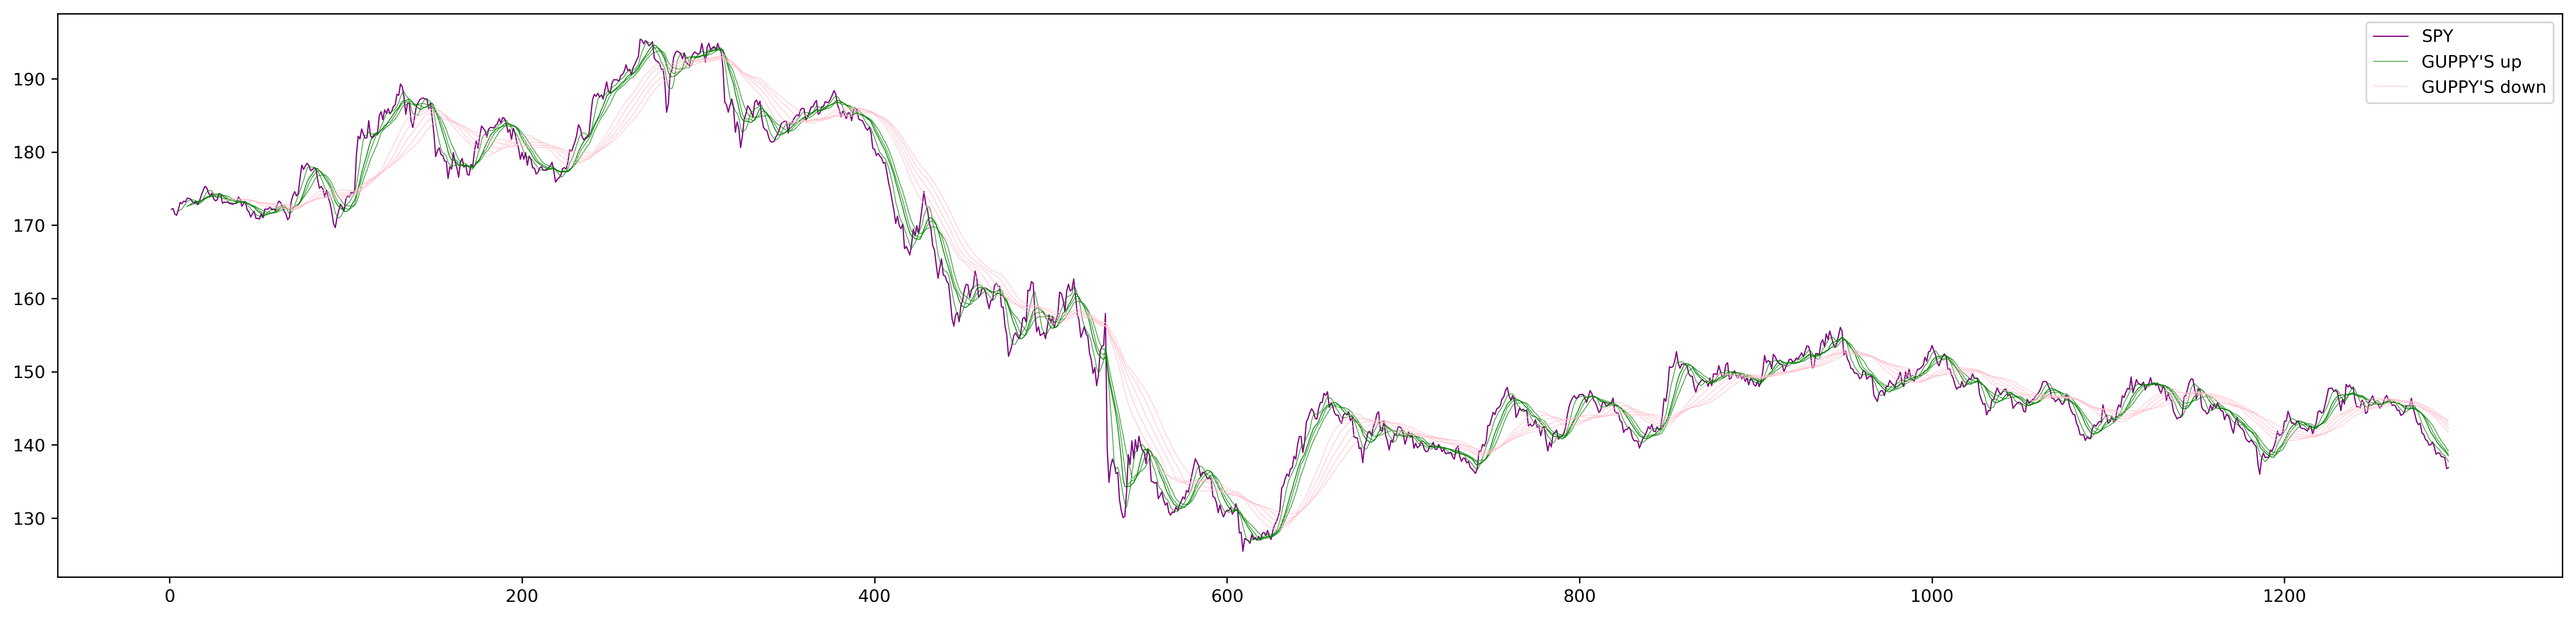

In [12]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_1D['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [13]:
delta5_8.shape,delta8_10.shape, delta10_12.shape, delta12_15.shape, delta15_30 .shape,delta30_35.shape,delta35_40.shape,delta40_45.shape, delta45_50.shape

((1293,),
 (1293,),
 (1293,),
 (1293,),
 (1293,),
 (1293,),
 (1293,),
 (1293,),
 (1293,))

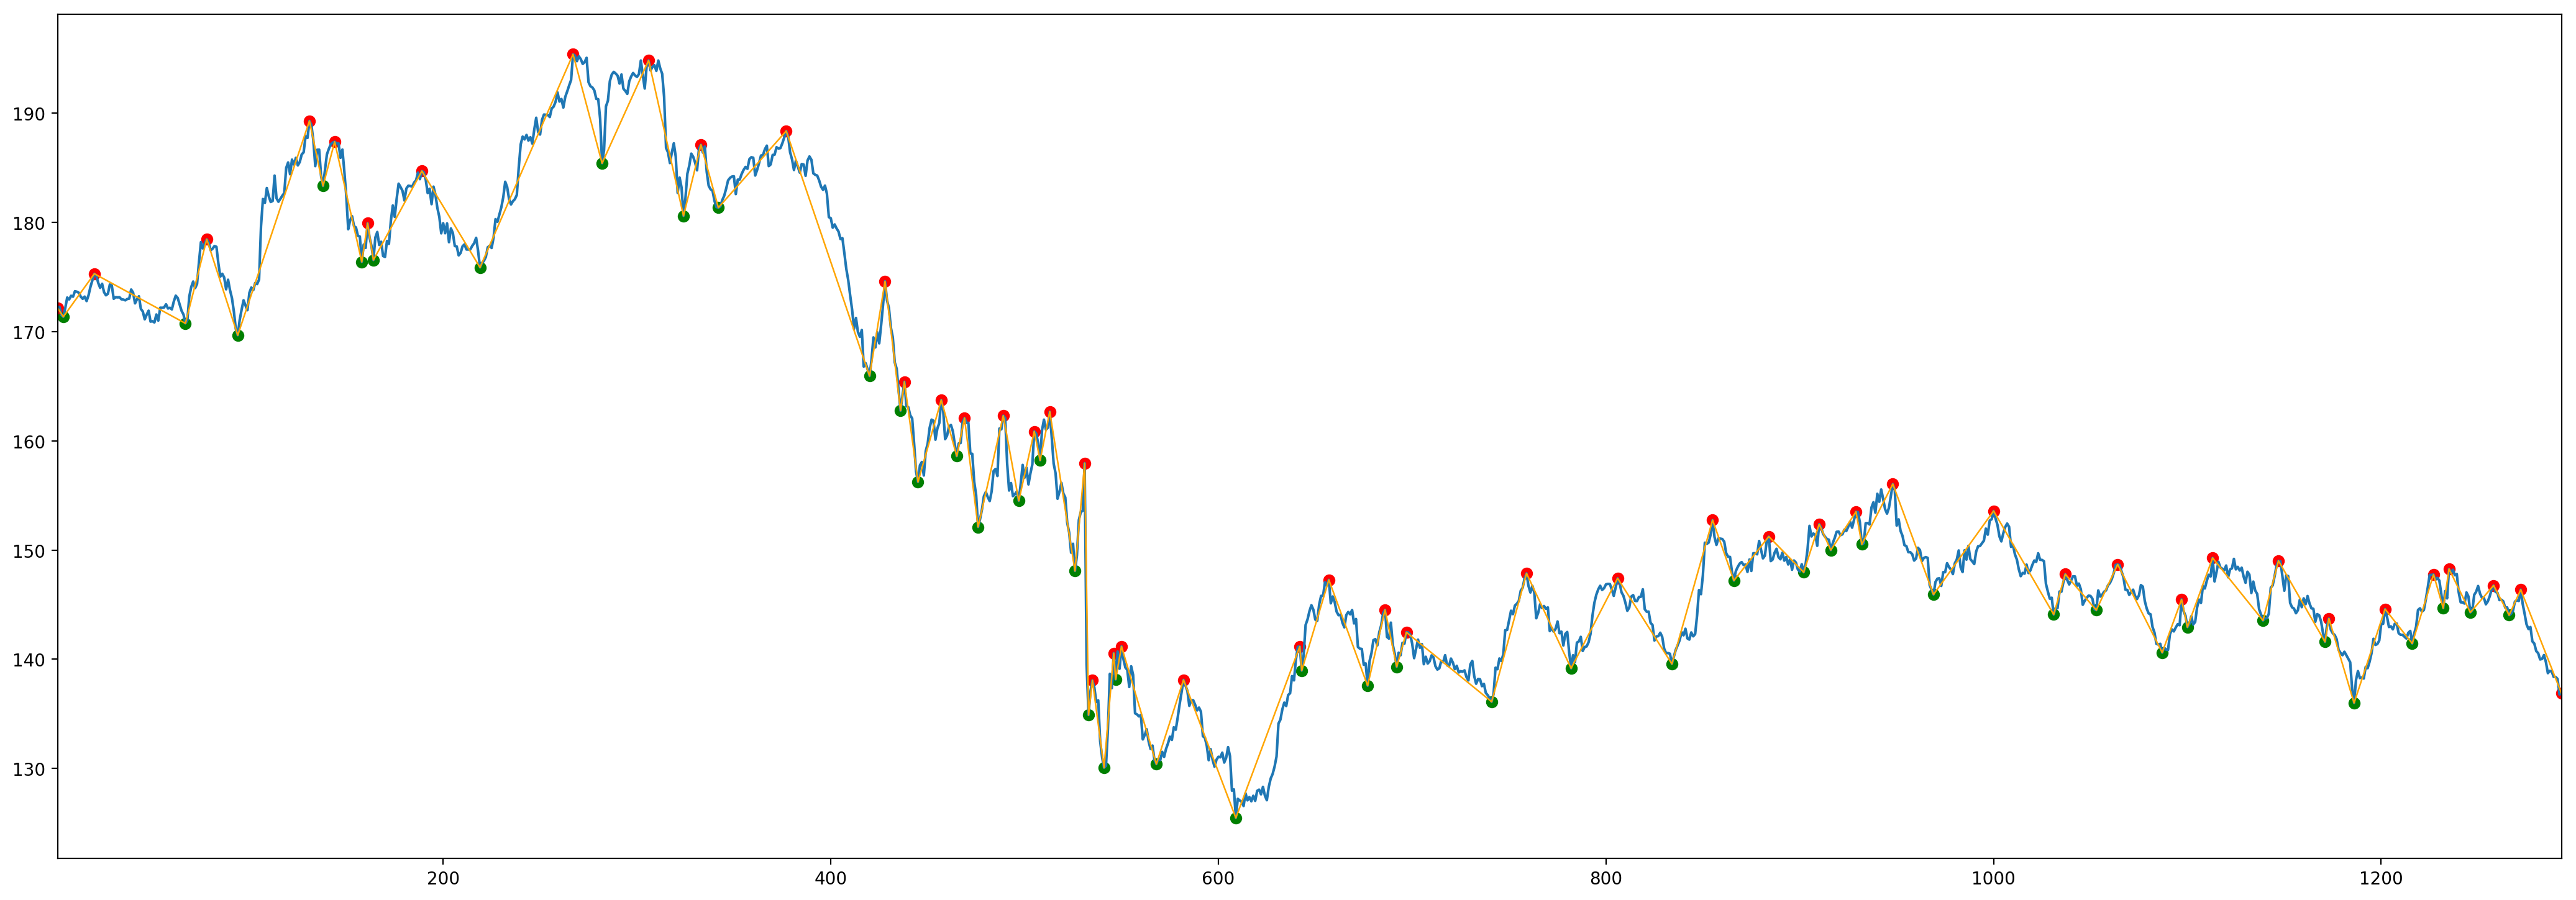

In [14]:
X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.015, -0.015)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots_up = ts_pivots[pivots == -1]
ts_pivots_down = ts_pivots[pivots == 1]
ts_pivots_all = ts_pivots[pivots!=0]

plt.figure(figsize=(26,9),dpi=200)
X.plot()
#ts_pivots_up.plot(style='g-o',lw=0.8,alpha=0.8)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

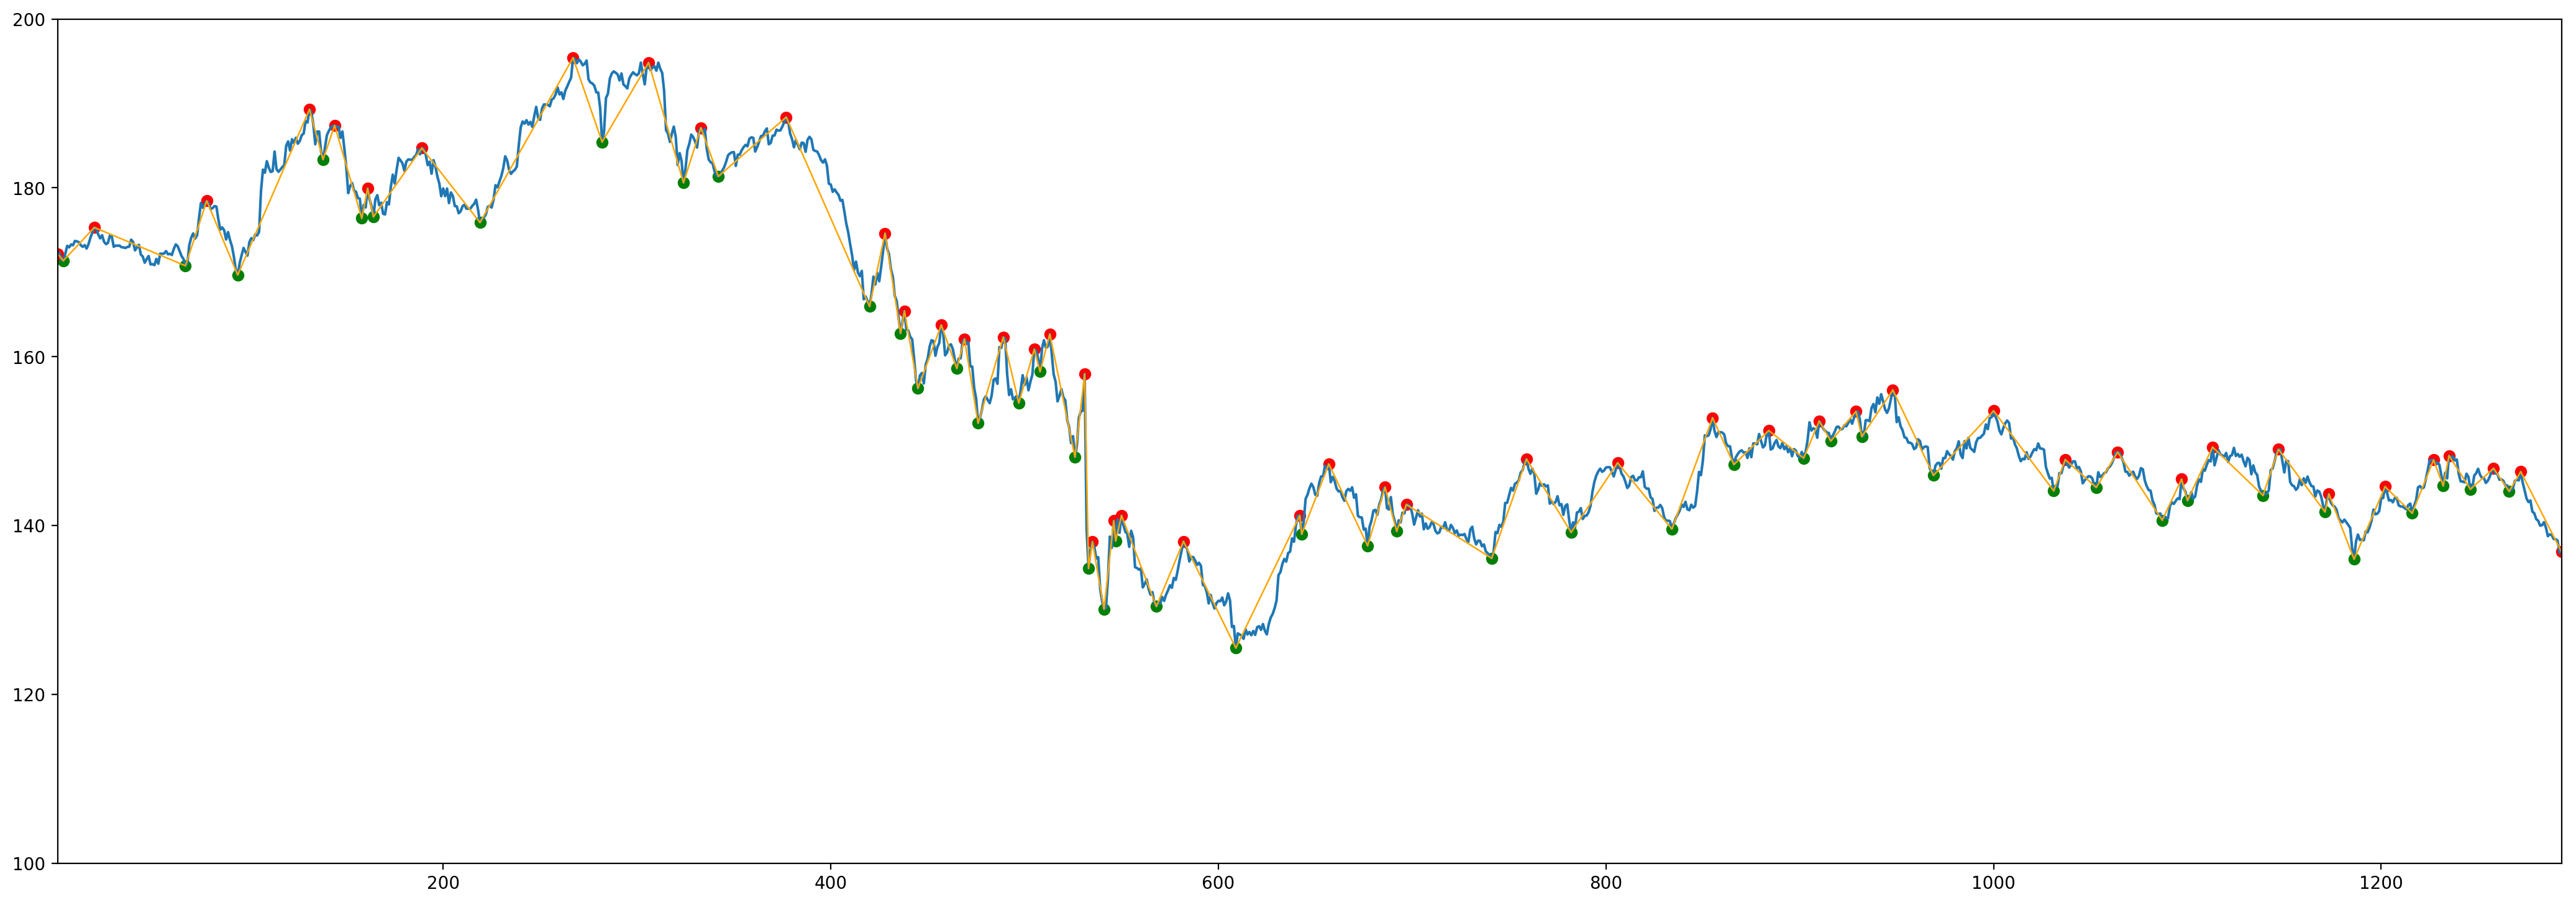

In [17]:
plt.figure(figsize=(26,9),dpi=200)
plt.xlim((900,1300))
plt.ylim((100,200))
plt.plot(X)
#ts_pivots_up.plot(style='g-o',lw=0.8,alpha=0.8)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)

In [18]:
len(pivots)

1293

In [19]:
bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

In [20]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape,dataset_1D.shape[0]

((1293,), (1293,), (1293,), (1293,), 1293)

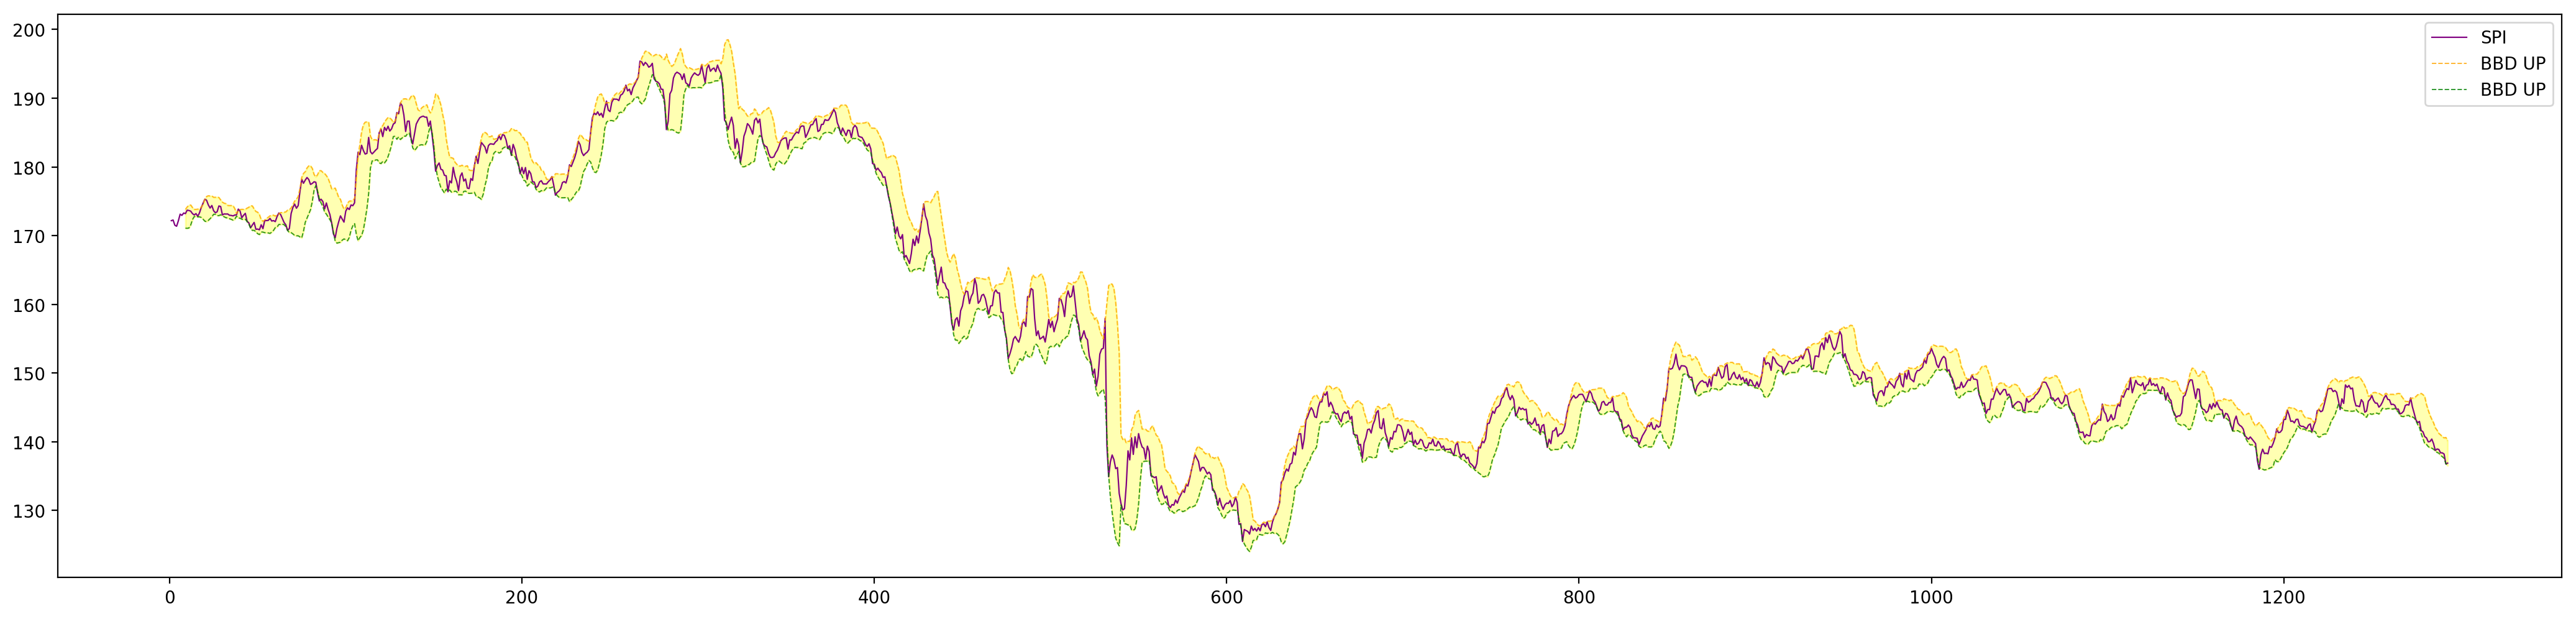

In [21]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1D.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [22]:
rsi[20]

72.75543483834184

In [23]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1D.shape[0]):
    try:
        rsi75_list.append(75 - rsi[i])
        rsi25_list.append(rsi[i] - 25)
    except:
        rsi75_list.append(0)
        rsi25_list.append(0)

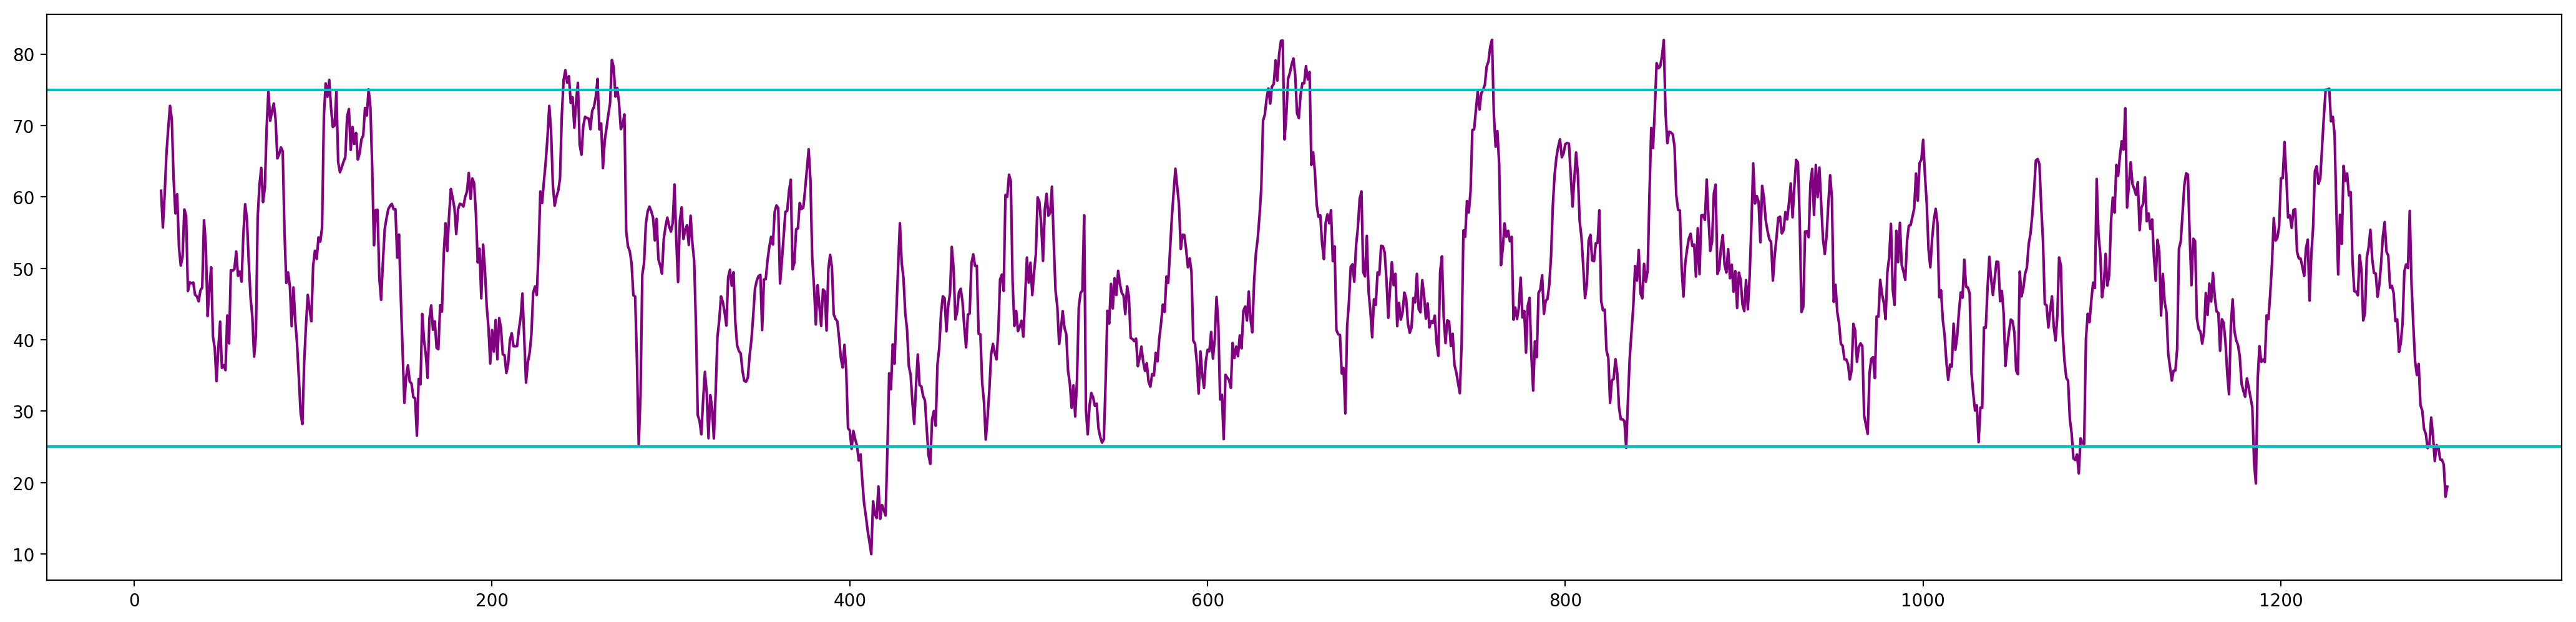

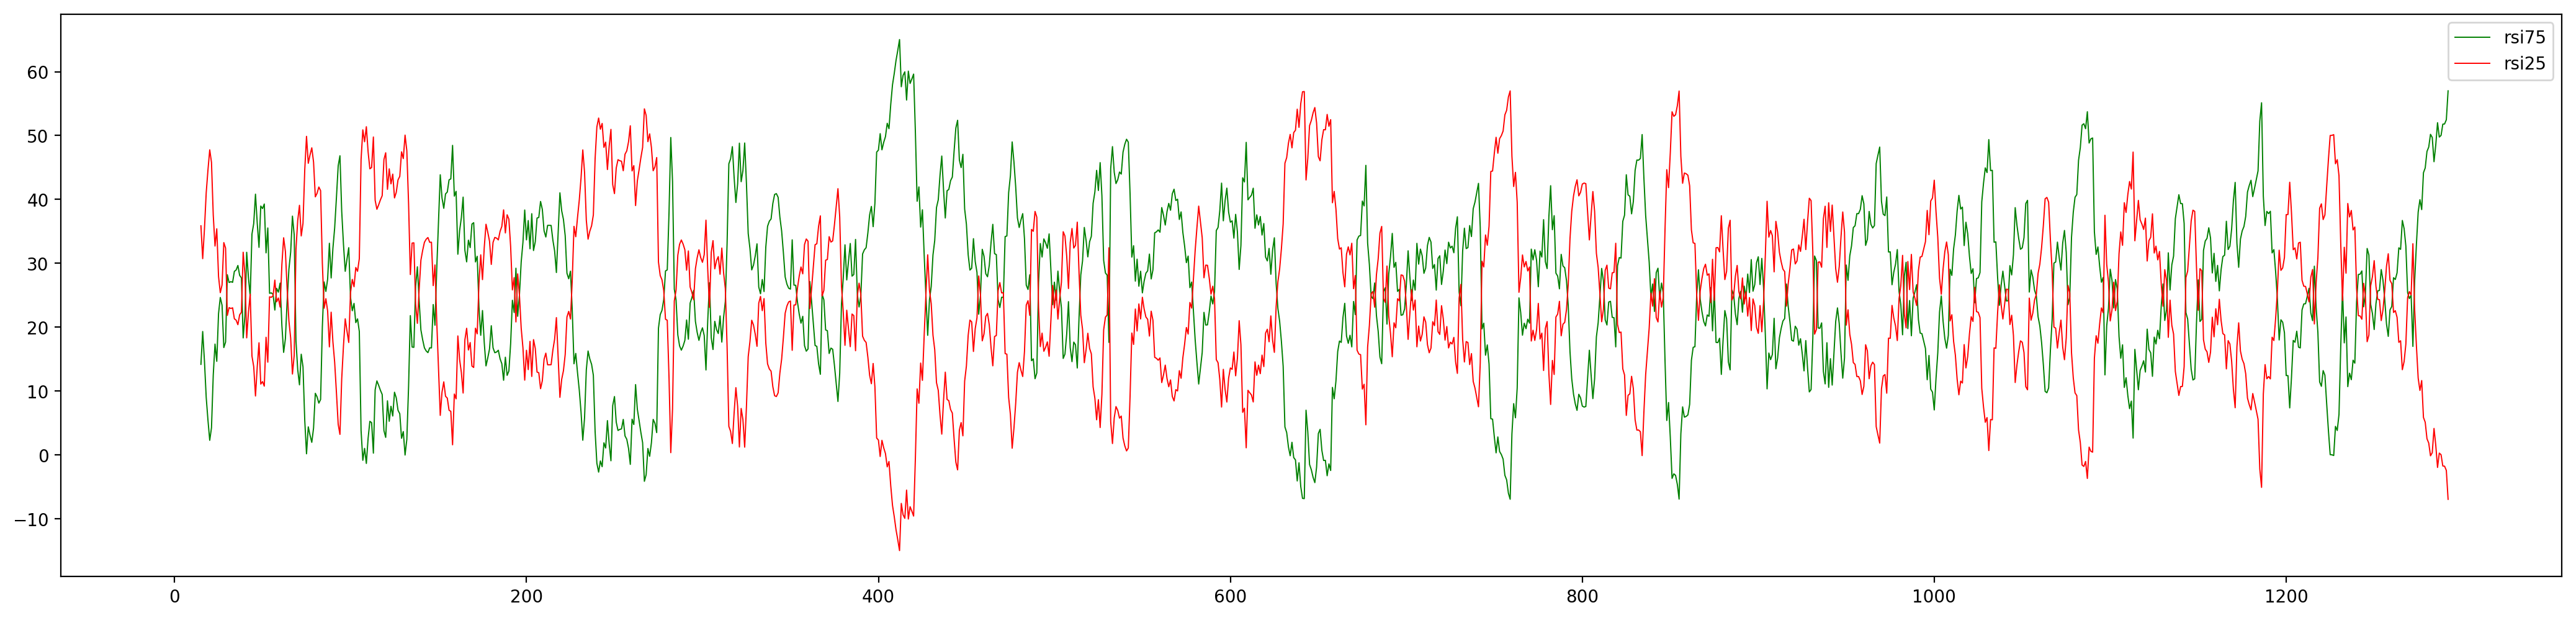

In [24]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [25]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']

In [26]:
varop_spy.shape,varhl_spy.shape

((1293,), (1293,))

In [27]:
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['RSI'] = rsi
dataset_1D['75 - RSI'] = np.array(rsi75_list)
dataset_1D['RSI - 25'] = np.array(rsi25_list)

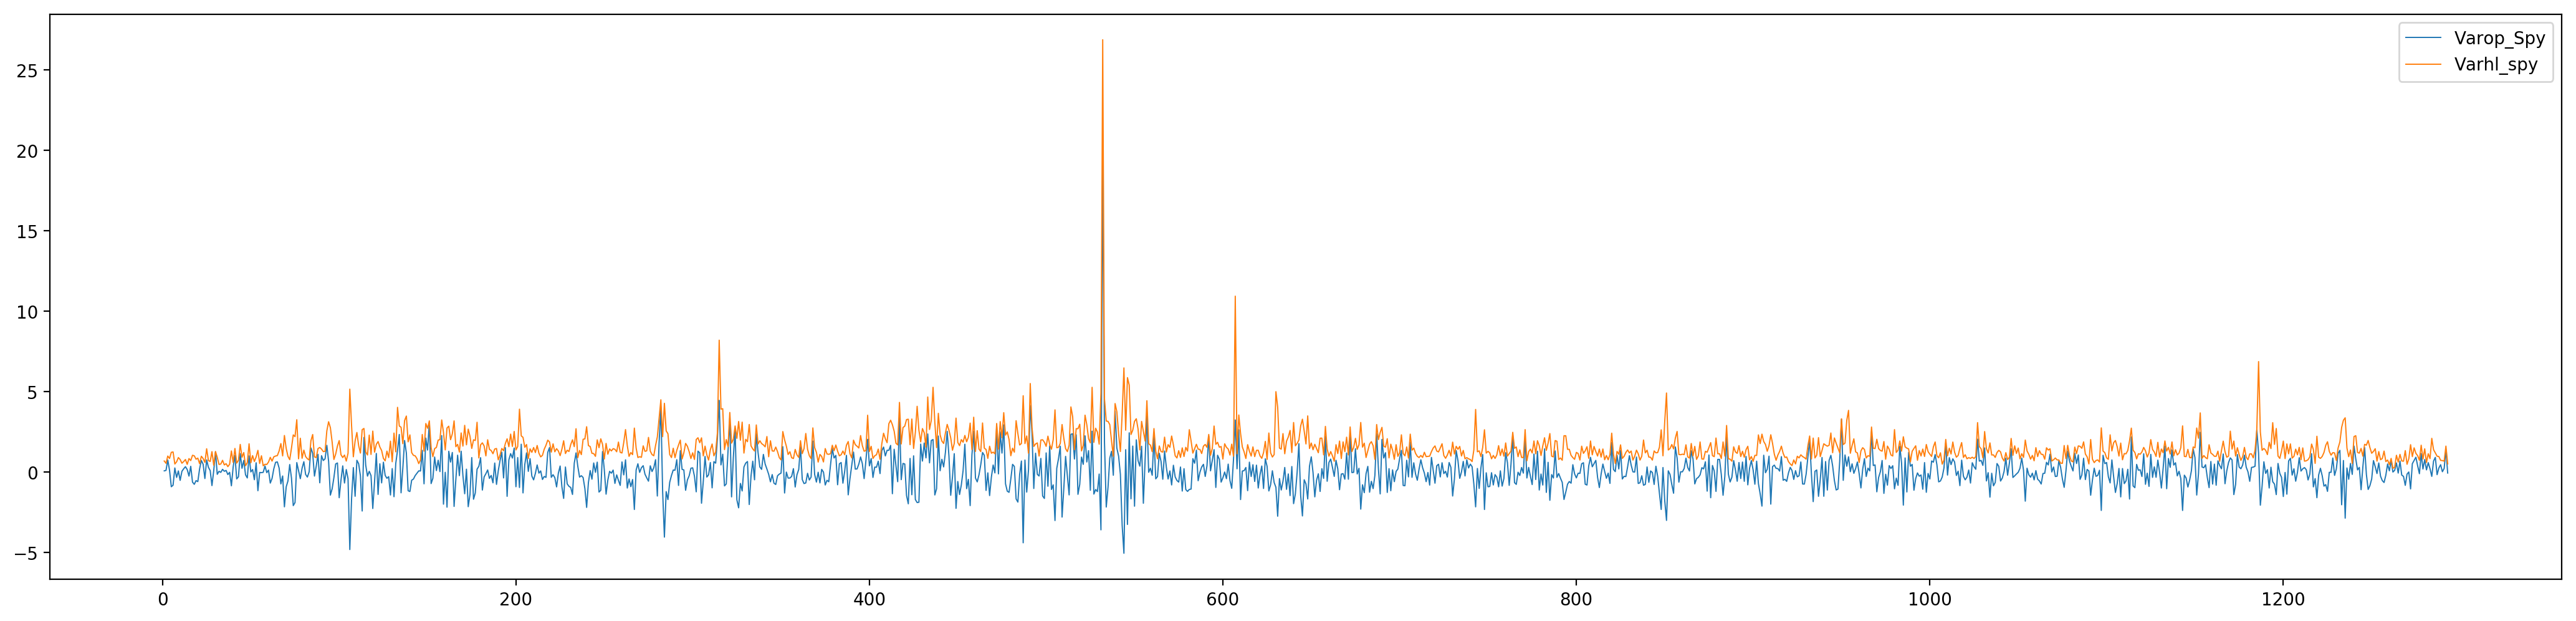

In [28]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1D['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()


In [29]:
dataset_1D.tail()

Date      Open     High       Low     Close  Varop_Spy  Varhl_spy  \
1289  20190528  138.8425  139.016  138.2930  138.3890     0.4535     0.7230   
1290  20190529  138.3975  138.586  137.8740  138.3795     0.0180     0.7120   
1291  20190530  138.4275  138.738  138.0615  138.2055     0.2220     0.6765   
1292  20190531  138.1505  138.246  136.6360  136.7740     1.3765     1.6100   
1293  20190603  136.8250  137.125  136.6200  136.8900    -0.0650     0.5050   

            RSI   75 - RSI  RSI - 25  
1289  23.223159  50.011430 -0.011430  
1290  23.188743  51.776841 -1.776841  
1291  22.530154  51.811257 -1.811257  
1292  18.000638  52.469846 -2.469846  
1293  19.414464  56.999362 -6.999362

In [30]:
dataset_1D['BBD_Delta_Up'] = bbdelta

dataset_1D.tail()

Date      Open     High       Low     Close  Varop_Spy  Varhl_spy  \
1289  20190528  138.8425  139.016  138.2930  138.3890     0.4535     0.7230   
1290  20190529  138.3975  138.586  137.8740  138.3795     0.0180     0.7120   
1291  20190530  138.4275  138.738  138.0615  138.2055     0.2220     0.6765   
1292  20190531  138.1505  138.246  136.6360  136.7740     1.3765     1.6100   
1293  20190603  136.8250  137.125  136.6200  136.8900    -0.0650     0.5050   

            RSI   75 - RSI  RSI - 25  BBD_Delta_Up  
1289  23.223159  50.011430 -0.011430      1.493132  
1290  23.188743  51.776841 -1.776841      1.444006  
1291  22.530154  51.811257 -1.811257      1.486935  
1292  18.000638  52.469846 -2.469846      1.906725  
1293  19.414464  56.999362 -6.999362      1.805221

In [31]:
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50

In [32]:
dataset_1D.tail()

Date      Open     High       Low     Close  Varop_Spy  Varhl_spy  \
1289  20190528  138.8425  139.016  138.2930  138.3890     0.4535     0.7230   
1290  20190529  138.3975  138.586  137.8740  138.3795     0.0180     0.7120   
1291  20190530  138.4275  138.738  138.0615  138.2055     0.2220     0.6765   
1292  20190531  138.1505  138.246  136.6360  136.7740     1.3765     1.6100   
1293  20190603  136.8250  137.125  136.6200  136.8900    -0.0650     0.5050   

            RSI   75 - RSI  RSI - 25  BBD_Delta_Up  delta5_8  delta8_10  \
1289  23.223159  50.011430 -0.011430      1.493132 -0.450500  -0.253900   
1290  23.188743  51.776841 -1.776841      1.444006 -0.521188  -0.217562   
1291  22.530154  51.811257 -1.811257      1.486935 -0.397750  -0.210550   
1292  18.000638  52.469846 -2.469846      1.906725 -0.379763  -0.341537   
1293  19.414464  56.999362 -6.999362      1.805221 -0.421088  -0.383112   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
1289   -0.316767   -0.603100   -2.255950   -0.466926   -0.314645   -0.191768   
1290   -0.282458   -0.553892   -2.319550   -0.526307   -0.303993   -0.236150   
1291   -0.248033   -0.519267   -2.383550   -0.550664   -0.325198   -0.295776   
1292   -0.237817   -0.438683   -2.506067   -0.564562   -0.379371   -0.346189   
1293   -0.246283   -0.428050   -2.541883   -0.563112   -0.443321   -0.364050   

      delta45_50  
1289   -0.176634  
1290   -0.185700  
1291   -0.180761  
1292   -0.183121  
1293   -0.219130

In [33]:
len(peak),len(valley),len(ts_pivots)

(1293, 1293, 1293)

In [34]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    689.000000
        1    603.000000
mean   -1     -0.003195
        1      0.003333
std    -1      0.007365
        1      0.006175
min    -1     -0.116669
        1     -0.011257
25%    -1     -0.006011
        1     -0.000635
50%    -1     -0.002257
        1      0.002624
75%    -1      0.000832
        1      0.006627
max    -1      0.013782
        1      0.037800
dtype: float64

In [35]:
compute_segment_returns(X, pivots).sum()

0.0

In [36]:

max_drawdown(np.array(X))

0.35784762772321815

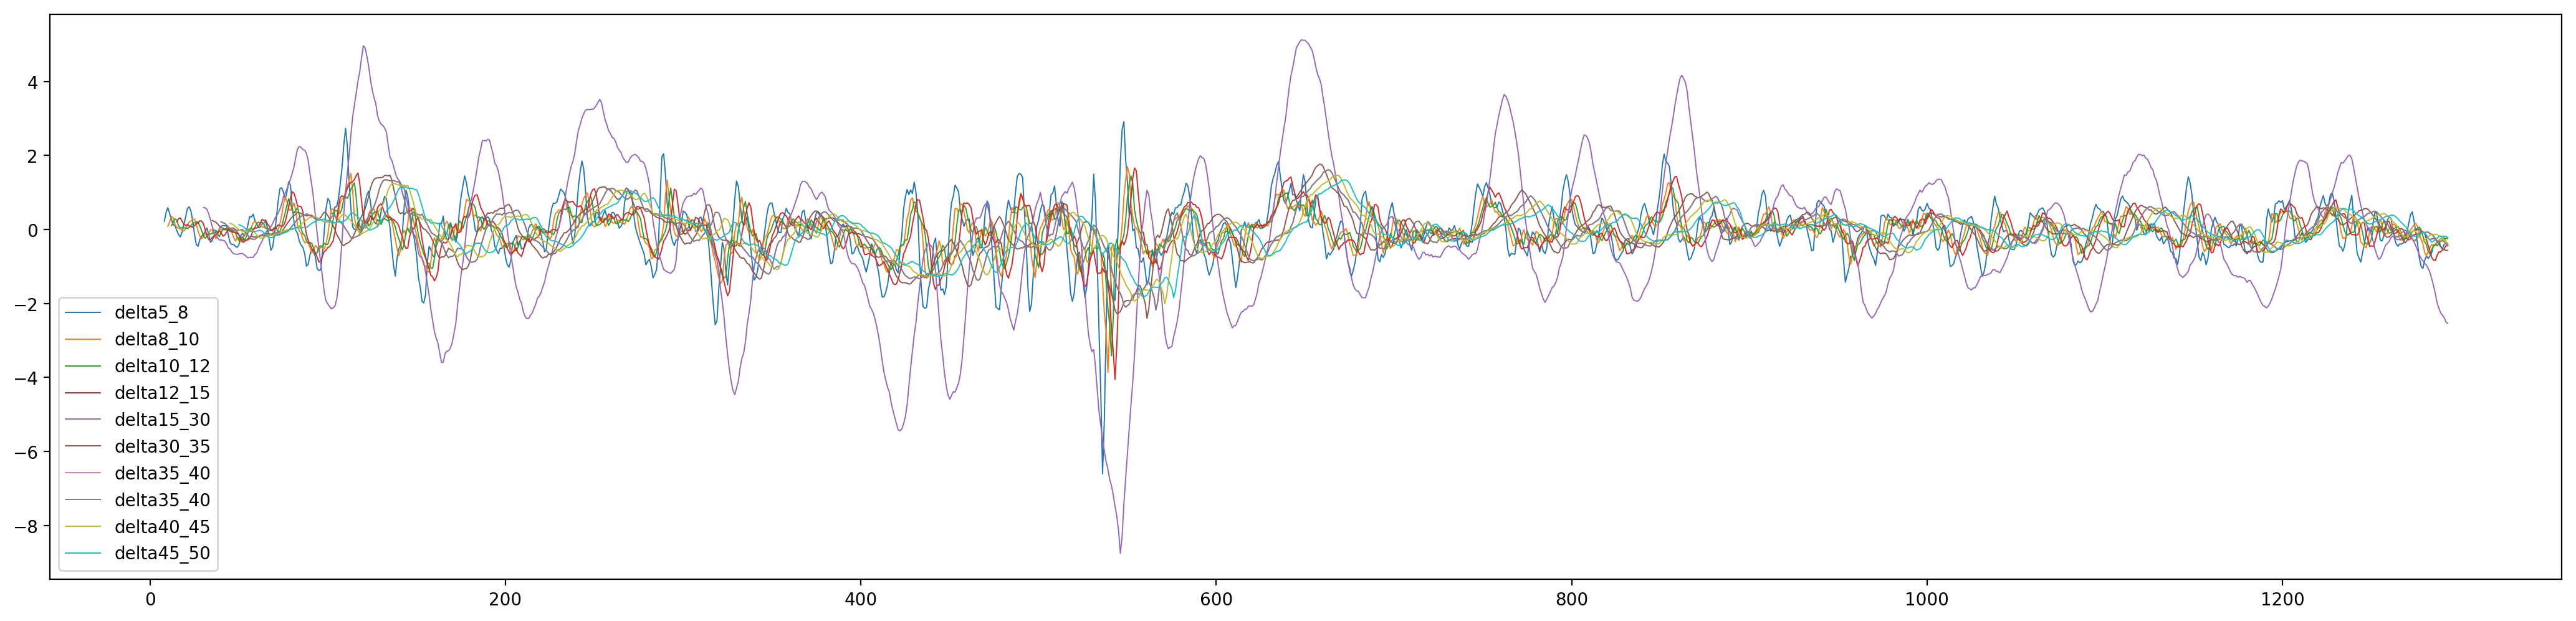

In [37]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [38]:
dataset_1D.tail()

Date      Open     High       Low     Close  Varop_Spy  Varhl_spy  \
1289  20190528  138.8425  139.016  138.2930  138.3890     0.4535     0.7230   
1290  20190529  138.3975  138.586  137.8740  138.3795     0.0180     0.7120   
1291  20190530  138.4275  138.738  138.0615  138.2055     0.2220     0.6765   
1292  20190531  138.1505  138.246  136.6360  136.7740     1.3765     1.6100   
1293  20190603  136.8250  137.125  136.6200  136.8900    -0.0650     0.5050   

            RSI   75 - RSI  RSI - 25  BBD_Delta_Up  delta5_8  delta8_10  \
1289  23.223159  50.011430 -0.011430      1.493132 -0.450500  -0.253900   
1290  23.188743  51.776841 -1.776841      1.444006 -0.521188  -0.217562   
1291  22.530154  51.811257 -1.811257      1.486935 -0.397750  -0.210550   
1292  18.000638  52.469846 -2.469846      1.906725 -0.379763  -0.341537   
1293  19.414464  56.999362 -6.999362      1.805221 -0.421088  -0.383112   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
1289   -0.316767   -0.603100   -2.255950   -0.466926   -0.314645   -0.191768   
1290   -0.282458   -0.553892   -2.319550   -0.526307   -0.303993   -0.236150   
1291   -0.248033   -0.519267   -2.383550   -0.550664   -0.325198   -0.295776   
1292   -0.237817   -0.438683   -2.506067   -0.564562   -0.379371   -0.346189   
1293   -0.246283   -0.428050   -2.541883   -0.563112   -0.443321   -0.364050   

      delta45_50  
1289   -0.176634  
1290   -0.185700  
1291   -0.180761  
1292   -0.183121  
1293   -0.219130

In [39]:
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 1293)

In [40]:
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
delta_tsf.shape

(1293,)

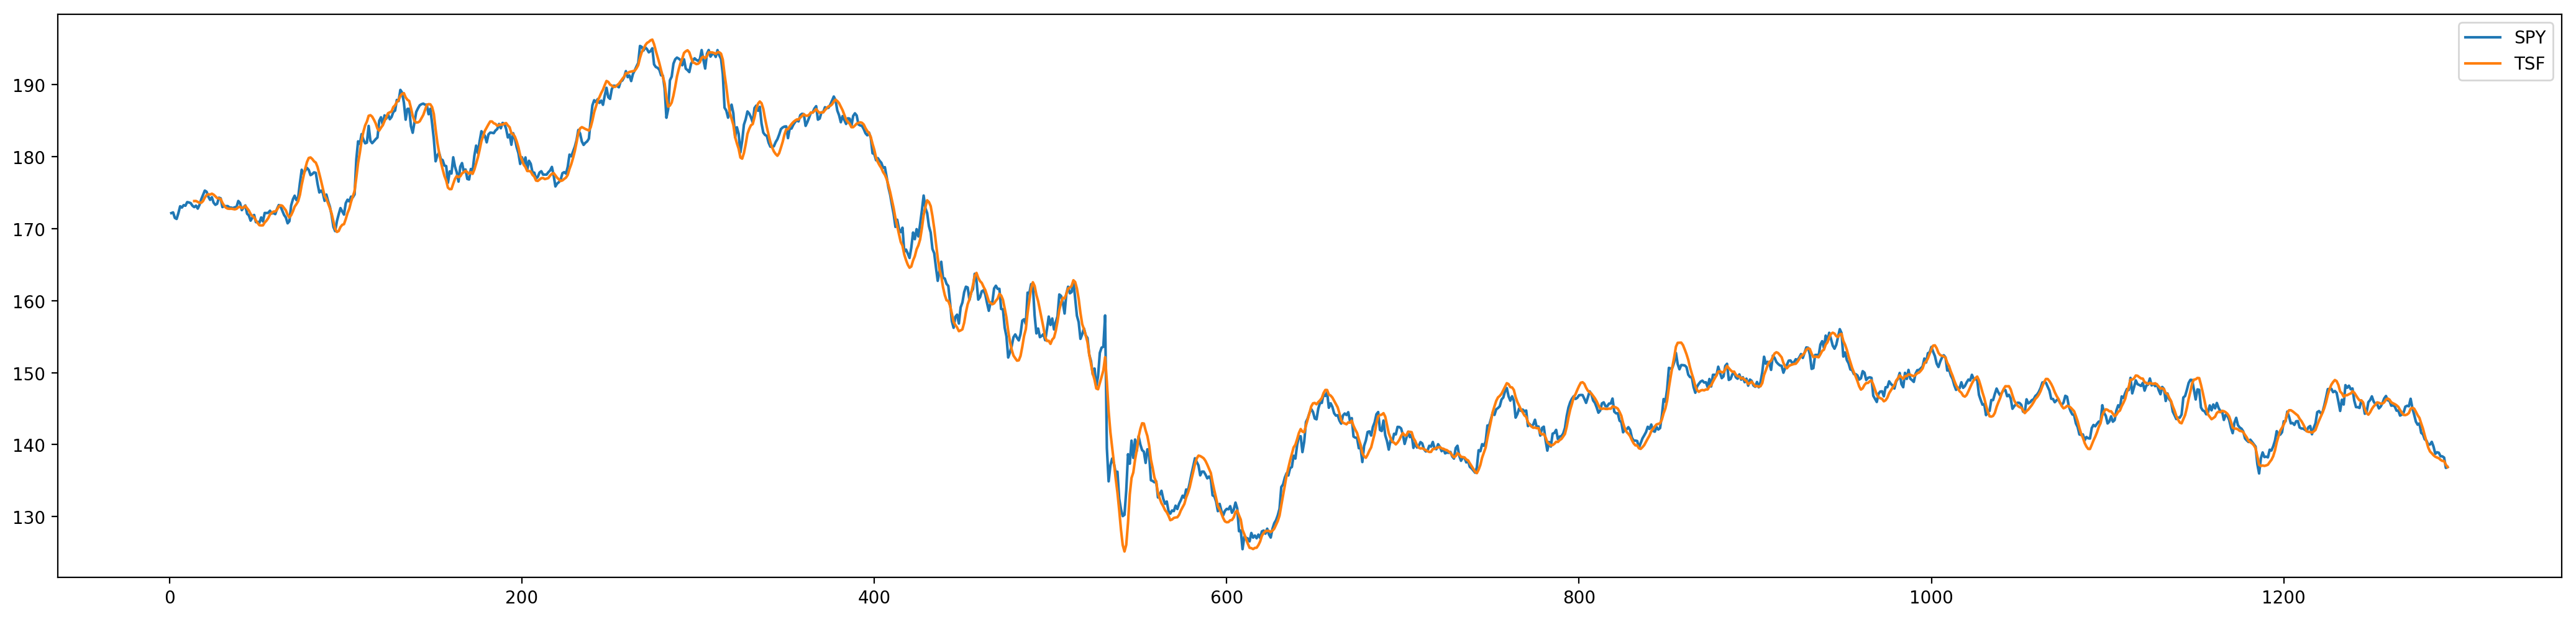

In [41]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [42]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    try:
        forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
    except:
        forosc.append(0)
len(forosc),type(forosc)

(1293, list)

In [43]:
dataset_1D['Forcast Oscillator'] = (forosc)

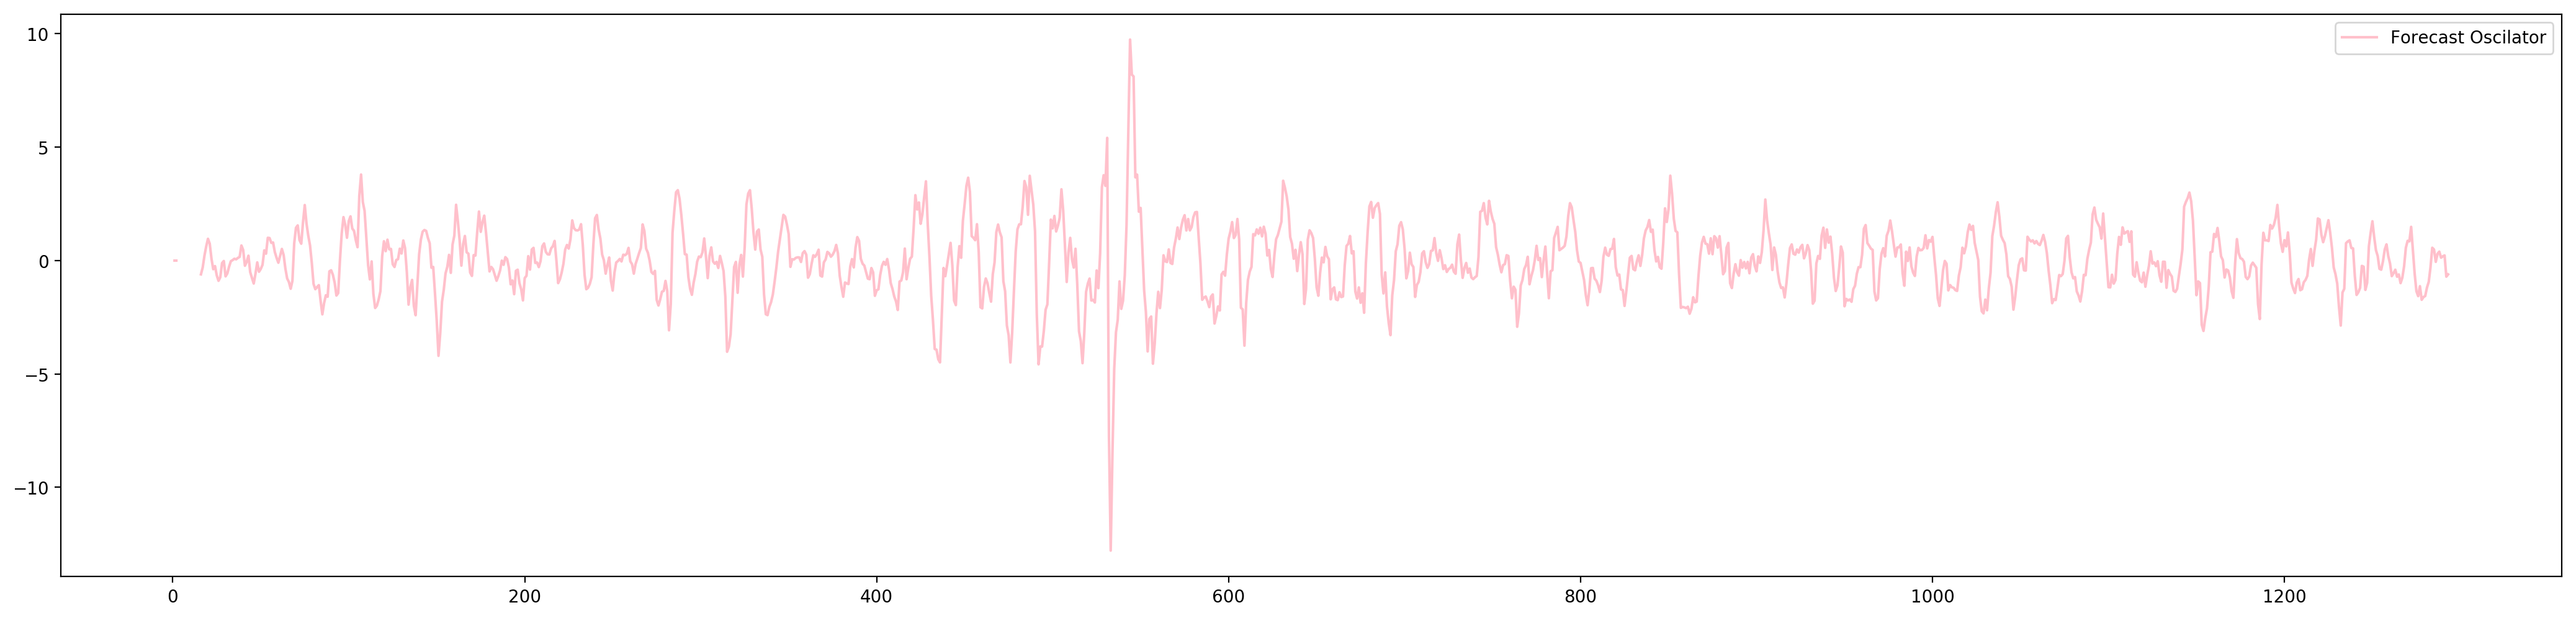

In [44]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1D['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

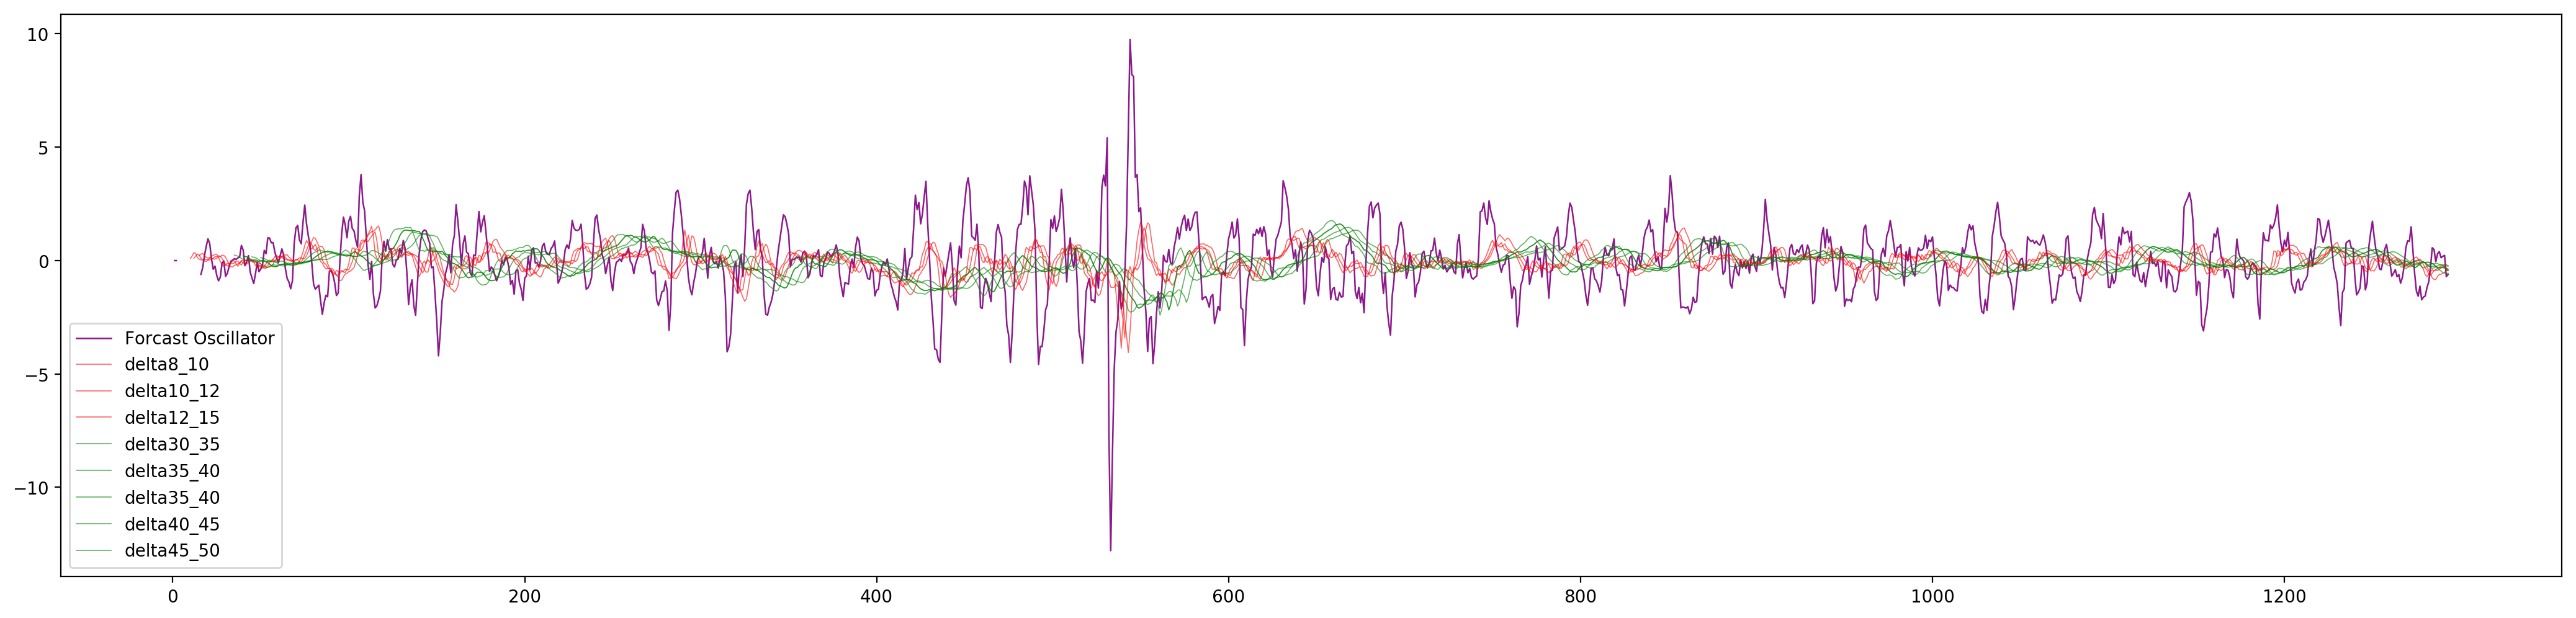

In [45]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1W['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1W['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [46]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 1 to 1293
Data columns (total 22 columns):
Date                  1293 non-null int64
Open                  1293 non-null float64
High                  1293 non-null float64
Low                   1293 non-null float64
Close                 1293 non-null float64
Varop_Spy             1293 non-null float64
Varhl_spy             1293 non-null float64
RSI                   1279 non-null float64
75 - RSI              1279 non-null float64
RSI - 25              1279 non-null float64
BBD_Delta_Up          1285 non-null float64
delta5_8              1286 non-null float64
delta8_10             1284 non-null float64
delta10_12            1282 non-null float64
delta12_15            1279 non-null float64
delta15_30            1264 non-null float64
delta30_35            1259 non-null float64
delta35_40            1254 non-null float64
delta40_45            1249 non-null float64
delta45_50            1244 non-null float64
delta_tsf      

In [47]:
df.head(0)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []

In [48]:
dataset_1D['target_up'] = abs(np.array(valley))
dataset_1D['target_down'] = abs(np.array(peak))

dataset_1D['target_up'].sum(),dataset_1D['target_down'].sum()

(45, 47)

In [49]:
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)

In [50]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 1 to 1293
Data columns (total 21 columns):
Date                  1293 non-null int64
Varop_Spy             1293 non-null float64
Varhl_spy             1293 non-null float64
RSI                   1279 non-null float64
75 - RSI              1279 non-null float64
RSI - 25              1279 non-null float64
BBD_Delta_Up          1285 non-null float64
delta5_8              1286 non-null float64
delta8_10             1284 non-null float64
delta10_12            1282 non-null float64
delta12_15            1279 non-null float64
delta15_30            1264 non-null float64
delta30_35            1259 non-null float64
delta35_40            1254 non-null float64
delta40_45            1249 non-null float64
delta45_50            1244 non-null float64
delta_tsf             1280 non-null float64
Forcast Oscillator    1280 non-null float64
target_up             1293 non-null int64
target_down           1293 non-null int64
target_value       

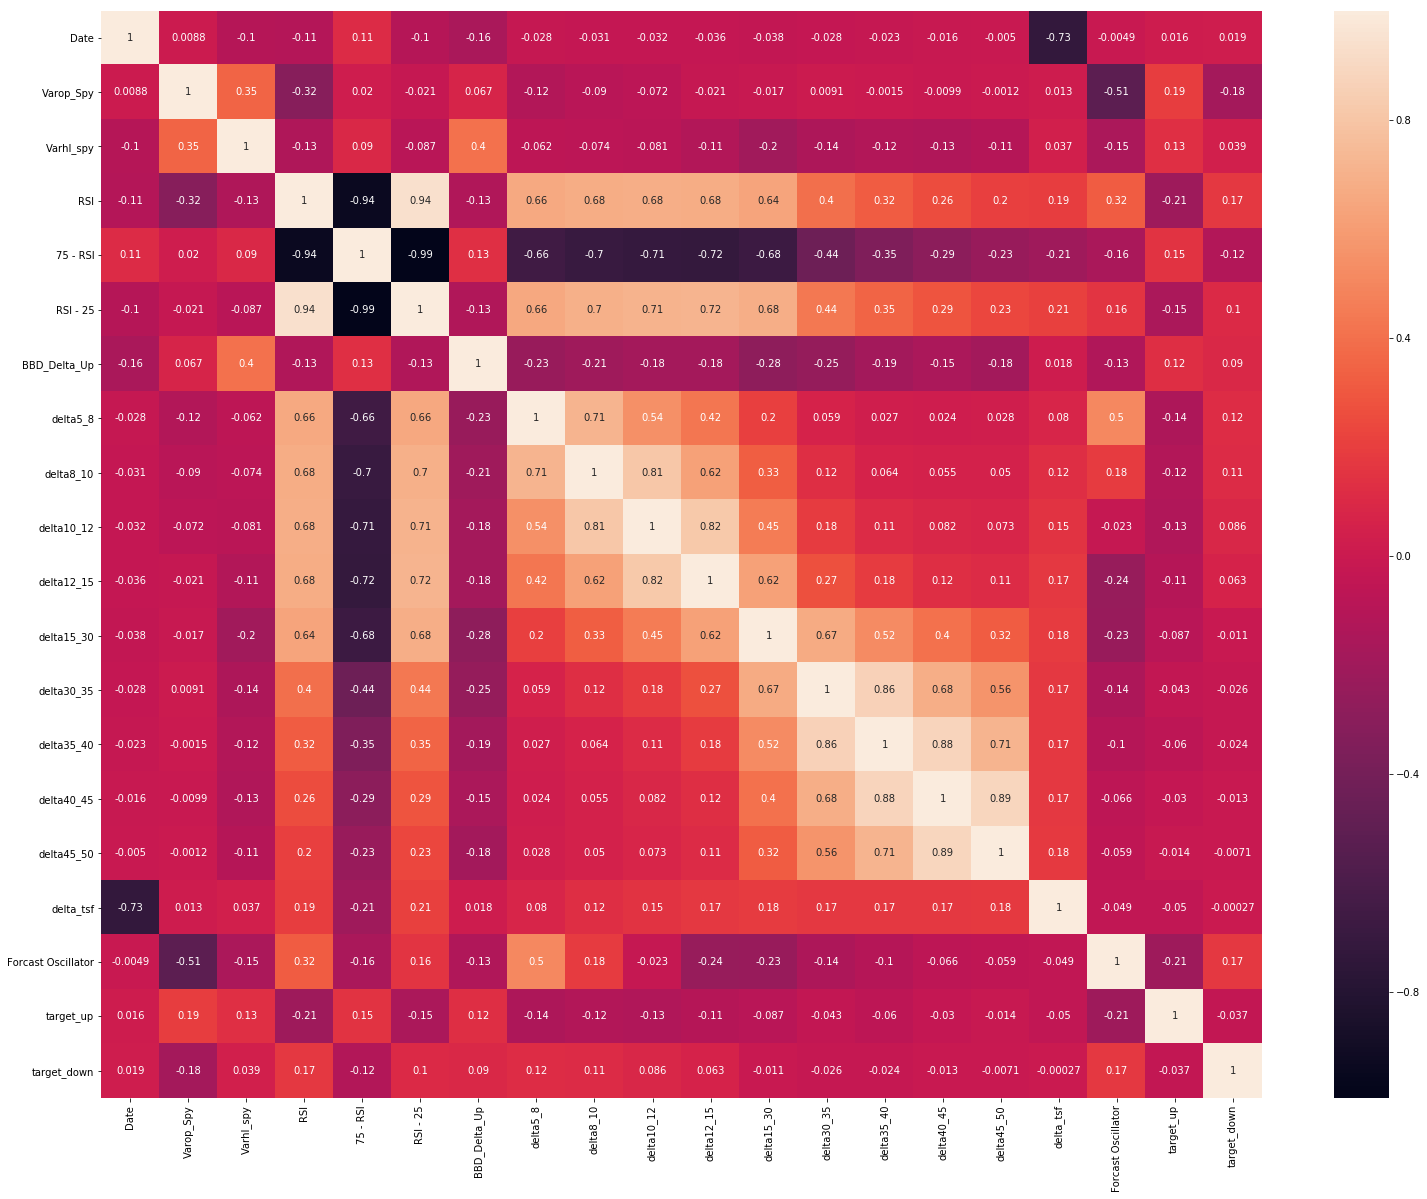

In [51]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1D.iloc[:,:-1].corr(),annot=True)
plt.show()

In [52]:
dataset_1D.tail()

Date  Varop_Spy  Varhl_spy        RSI   75 - RSI  RSI - 25  \
1289  20190528     0.4535     0.7230  23.223159  50.011430 -0.011430   
1290  20190529     0.0180     0.7120  23.188743  51.776841 -1.776841   
1291  20190530     0.2220     0.6765  22.530154  51.811257 -1.811257   
1292  20190531     1.3765     1.6100  18.000638  52.469846 -2.469846   
1293  20190603    -0.0650     0.5050  19.414464  56.999362 -6.999362   

      BBD_Delta_Up  delta5_8  delta8_10  delta10_12  ...  delta15_30  \
1289      1.493132 -0.450500  -0.253900   -0.316767  ...   -2.255950   
1290      1.444006 -0.521188  -0.217562   -0.282458  ...   -2.319550   
1291      1.486935 -0.397750  -0.210550   -0.248033  ...   -2.383550   
1292      1.906725 -0.379763  -0.341537   -0.237817  ...   -2.506067   
1293      1.805221 -0.421088  -0.383112   -0.246283  ...   -2.541883   

      delta30_35  delta35_40  delta40_45  delta45_50   delta_tsf  \
1289   -0.466926   -0.314645   -0.191768   -0.176634  137.889495   
1290   -0.526307   -0.303993   -0.236150   -0.185700  137.742396   
1291   -0.550664   -0.325198   -0.295776   -0.180761  137.722247   
1292   -0.564562   -0.379371   -0.346189   -0.183121  137.218082   
1293   -0.563112   -0.443321   -0.364050   -0.219130  136.873445   

      Forcast Oscillator  target_up  target_down  target_value  
1289            0.127833          0            0      138.3890  
1290            0.188318          0            0      138.3795  
1291            0.228649          0            0      138.2055  
1292           -0.708026          0            0      136.7740  
1293           -0.607968          0            1      136.8900  

[5 rows x 21 columns]

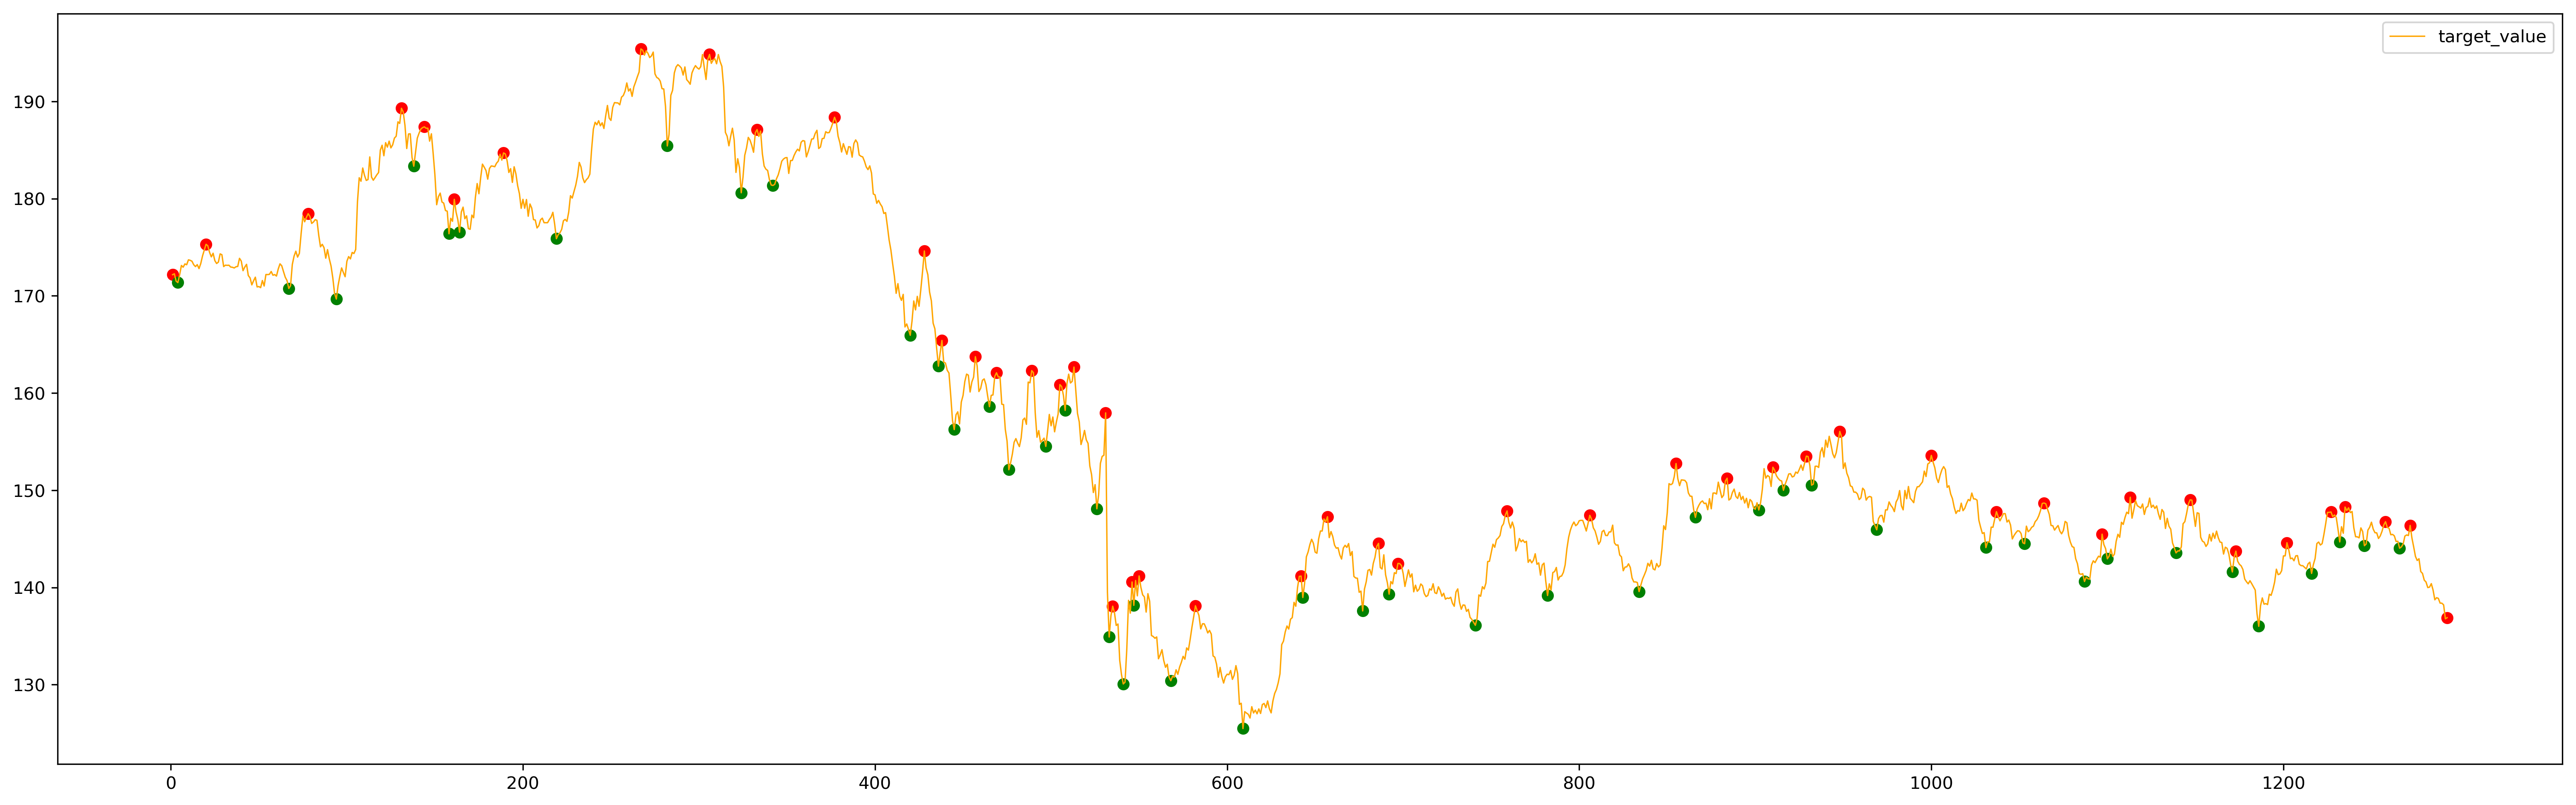

In [53]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1D['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1D)):
    if dataset_1D.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='g',marker='o')
    elif dataset_1D.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [54]:
dataset_1D.to_csv('20190603 data_1D prepared.csv')